# Problem set 4


Hunter Prout

Problem set 4 



## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.

In [1]:
set maxvar 32000
use GSS2022.dta, clear 
eststo clear 


In [2]:
keep rincome race age educ sex 

In [3]:
%set graph_height = 8 

graph size was (5.5in, 4in), is now (5.5in, 8).


In [4]:
%set graph_width = 11 

graph size was (5.5in, 8), is now (11, 8).


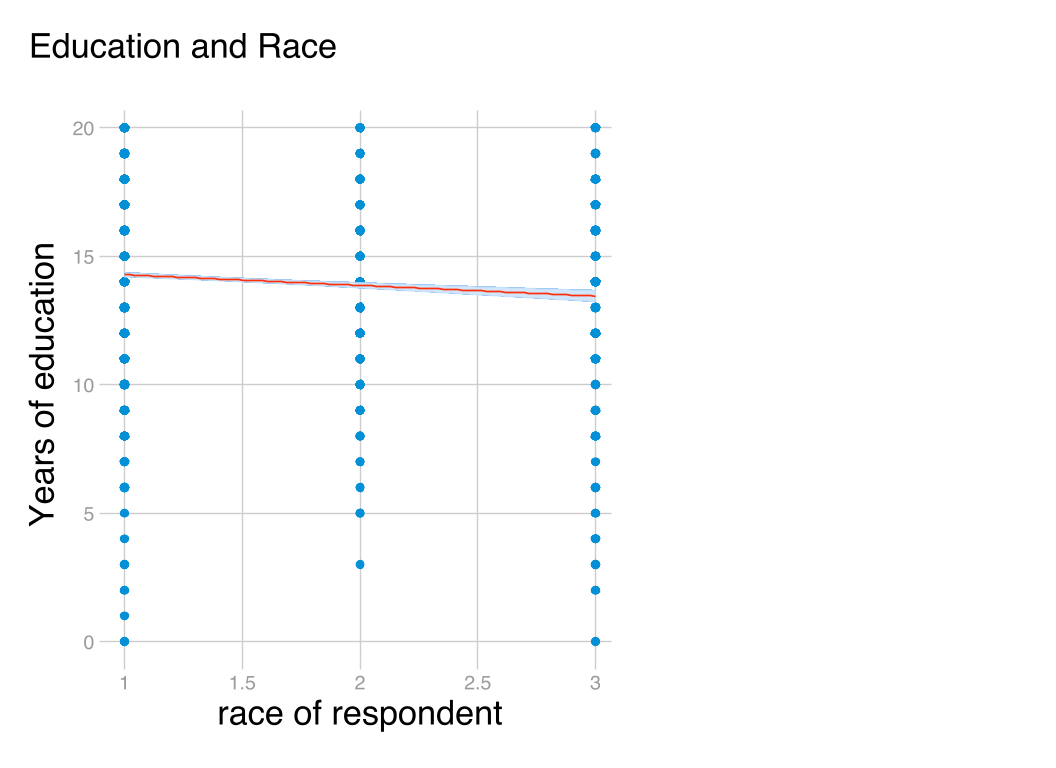

In [5]:
tw (scatter educ race) /// 
(lfitci educ race), /// 
ytitle(Years of education, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Education and Race" " ", span size(large)) /// 
aspect(1,place(west))

In [6]:
codebook race


-------------------------------------------------------------------------------
race                                                         race of respondent
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: RACE

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/3,544
       Unique mv codes: 1                        Missing .*: 53/3,544

            Tabulation: Freq.   Numeric  Label
                        2,514         1  white
                          565         2  black
                          412         3  other
                           53        .i  iap


Based on the distribution of the scatterplot, the gaps on the X axis are only significant onf racial categories. These categories show that there is variation in the Black or 2 category in comparison to the white (1) and other(3) racial groups. 

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [7]:
quietly reg educ race
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of educ

H0: Constant variance

    chi2(1) =  22.53
Prob > chi2 = 0.0000


My P value is less than 0.05 so the constant variance null hypothesis is rejected. There is a high likelyhood that there is heteroskedasiticity in the distribution 



## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [8]:
eststo: quietly reg educ race

(est1 stored)


In [18]:
eststo: quietly bootstrap _b[race], rep(1000) nodots : /// 
    reg educ race

(est3 stored)


In [30]:
esttab, /// 
mlabels("OLS" "Bootstrap") ///
collabels(none) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap            est3   
------------------------------------------------------------
race                -0.42***                                
                   (0.07)                                   
_bs_1                               -0.42***        -0.42***
                                   (0.08)          (0.08)   
_cons               14.69***                                
                   (0.11)                                   
------------------------------------------------------------
N                    3472            3472            3472   
------------------------------------------------------------


The standard error increases slightly in the bootstrap sample this signifies that the OLS model is not the most robust for determining and identifyung the variablity in my data. The bootsrap model uses random samples or points in my data and estimates the standard error automatically multiple times while replacing the data in each sample estimate with data from my data set. This is repeated to find a more accurate indication of my standard error. 

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [32]:
eststo: quietly reg educ race, robust

(est4 stored)


In [33]:
esttab, /// 
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
                      OLS       Bootstrap          Robust            est4   
----------------------------------------------------------------------------
race                -0.42***                                        -0.42***
                   (0.07)                                          (0.08)   
_bs_1                               -0.42***        -0.42***                
                                   (0.08)          (0.08)                   
_cons               14.69***                                        14.69***
                   (0.11)                                          (0.12)   
----------------------------------------------------------------------------
N                    3472            3472            3472            3472   
---------------------------------------------------------------------------

My coefficent is still statistically siginficant. Because the standard error for the bootstrap sample and the robust model are both slightly larger than the OLS model, I can assume that these models are slightly better than OLS at managing the heteroskedaticity in my data. This model works to apply more weight to larger deviations in my data that should be more significant; taking into account that some outliers may exist in the data. 

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

Because there are only a few clusters in my independent variable (there are only 3 groups), I would nor use cluster robust standard errors. 